In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 非矩阵方法

### 生成y=2x+1，波动范围为10的训练集，训练集大小为[100,100]

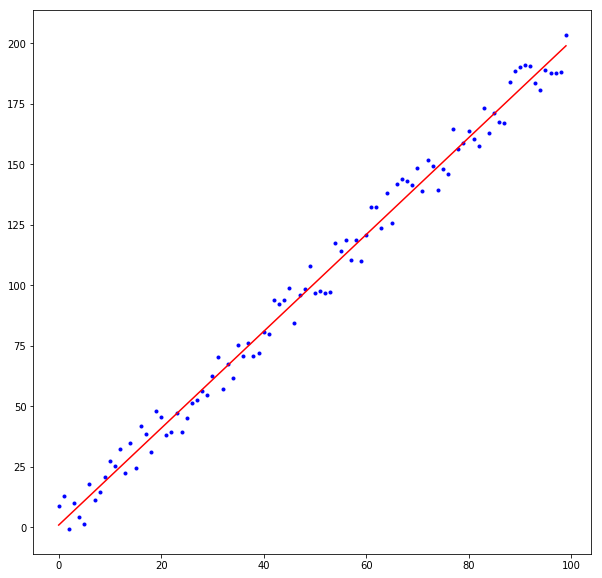

In [30]:
x = np.arange(100)
y = np.array(len(x))
y = 2*x+1+20*np.random.rand(len(x))-10
y0 = 2*x+1

plt.figure(figsize=(10, 10))
plt.plot(x, y, "b.")
plt.plot(x, y0, "r")

##### 以上为示意图，红线为原函数，蓝色点为施加波动后的结果

## 梯度下降法做线性回归

In [31]:
# 定义代价函数
def Cost(x, y, theta_0, theta_1):
    j = 0
    for i in range(len(x)-1):
        j = +(theta_1*x[i]+theta_0-y[i])**2
    return j/(len(x)*2)

In [32]:
# 设定初值、迭代次数、学习率
theta_0, theta_1 = 3, 1
iters = 200000
alpha = 0.00001


def h(x):
    return theta_1*x+theta_0


def error(x, y):
    return h(x)-y


def error_total(x, y):
    err = 0
    for n in range(len(x)):
        err += error(x[n], y[n])
    return err


for i in range(iters):
    temp_1 = theta_1-alpha*error_total(x, y)*theta_1/len(x)
    temp_0 = theta_0-alpha*error_total(x, y)/len(x)
    theta_1 = temp_1
    theta_0 = temp_0
    if Cost(x, y, theta_0, theta_1) < 0.000001:
        break

In [33]:
theta_1

1.881912430471582

In [34]:
theta_0

3.632376730955937

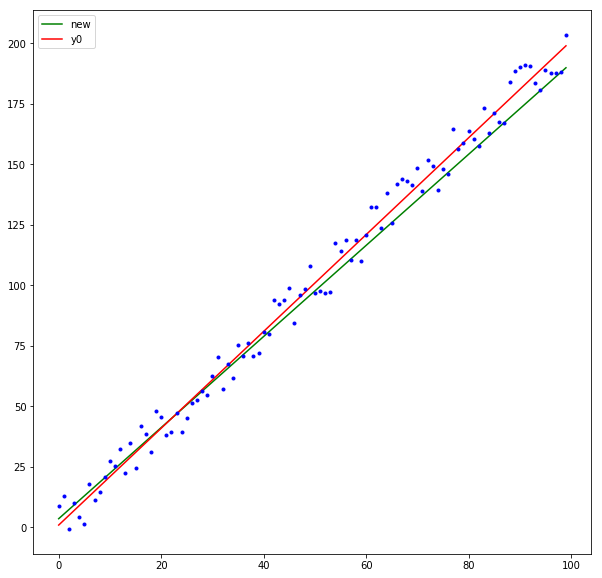

In [35]:
plt.figure(figsize=(10, 10))

plt.plot(x, theta_1*x+theta_0, "g")
plt.plot(x, y0, "r")
plt.plot(x, y, "b.")
plt.legend(["new", "y0"])

In [2]:
def truevalue1(x, a, b, c, d):
    return a+b*x+c*x**2+d*x**3


def truevalue2(x, a):
    return np.sin(a*x)


def truevalue3(x, a):
    return np.sin(a*x)/(a*x)

## 生成训练集

In [8]:
# 样本数
m = 60

a = 1
b = 2
c = 3
d = 4

flucuation = 1

# 随机数种子
np.random.seed(0)
x = np.random.rand(m, 1)-0.5  # 原点附近的随机数
flu_array = flucuation*(np.random.rand(m, 1)-0.5)  # 波动值向量
y = truevalue1(x, a, b, c, d)+flu_array

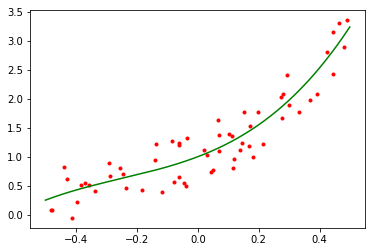

In [9]:
x0 = np.arange(-0.5, 0.5, 0.001)
y0 = truevalue1(x0, a, b, c, d)
plt.plot(x, y, "r.", x0, y0, "g")

## 矩阵化

In [10]:
# 数据集插入x0=1的列
def Data_array(x, n):
    """
    原x为数据集（列向量），
    n为数据集的特征数-1（线性回归的最高阶数），即返回的数据集矩阵列数-1
    每一列对应原列向量的值的（矩阵列序数-1）次方
    返回值为数据矩阵
    """
    XX = np.insert(x, 0, values=1, axis=1)
    g = x
    for i in np.arange(n-1):  # 2次方开始循环 np.arange左闭右开
        g = g*x  # 写成x**(i+2)应该会减少内存占用但是可能会增加运算次数？
        XX = np.column_stack((XX, g))  # 矩阵列合并、拓展函数
    return XX


n = 3

X = Data_array(x, n)
Y = y

Theta1 = np.random.rand(n+1, 1)

In [11]:
def J(X, Y, Theta):
    return np.dot((np.dot(X, Theta)-Y).T, np.dot(X, Theta)-Y)/2/m

## Normal Equation

$\Theta = ((X^TX))^{-1}X^TY$

In [12]:
def NormalEquation(X, Y):
    """
    只适用于线性模型
    """
    C = np.dot(X.T, X)
    B = np.linalg.inv(C)  # 逆矩阵
    D = np.dot(B, X.T)
    return np.dot(D, Y)

In [13]:
Theta_prediction1 = NormalEquation(X, Y)
Y_prediction1 = np.dot(X, Theta_prediction1)

In [14]:
J(X, Y, Theta_prediction1)

array([[0.04199707]])

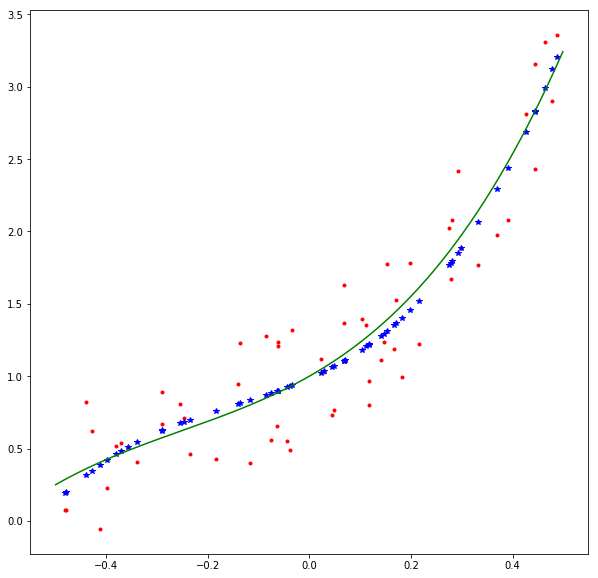

In [15]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction1, "b*", x0, y0, "g")

## 梯度下降

In [16]:
alpha = 1
iters = int(input())  # 便于调整下降次数
J = np.empty(iters)
times = np.arange(iters)
Theta2 = np.random.rand(n+1, 1)
for i in np.arange(iters):
    Theta2 = Theta2 - alpha*np.dot(X.T, (np.dot(X, Theta2)-Y))/m
    J[i] = np.dot((np.dot(X, Theta2)-Y).T, np.dot(X, Theta2)-Y)/2/m

100000


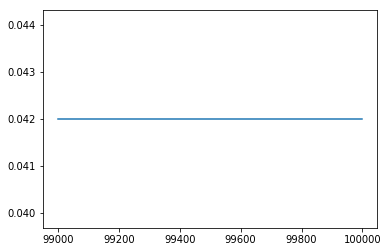

In [17]:
plt.plot(times[iters-1000:], J[iters-1000:])  # 因为n=3需要迭代的次数较多，约十万次后能收敛

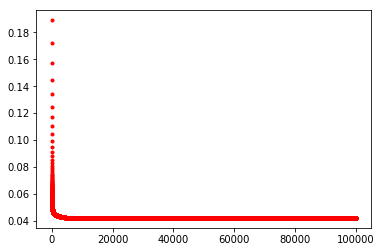

In [18]:
plt.plot(times, J, "r.")

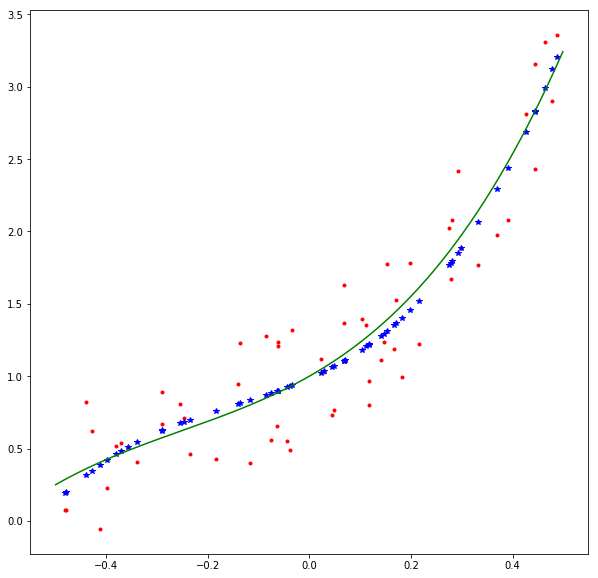

In [19]:
Y_prediction2 = np.dot(X, Theta2)
plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction2, "b*", x0, y0, "g")

## 生成验证集并验证推广能力

In [20]:
# 验证集样本数
p = 20

x_prove = np.random.rand(p, 1)-0.5  # (-0.5,0.5)的随机数

y_true = truevalue1(x_prove, a, b, c, d)
# normal equ.
y_predict1 = Theta_prediction1[0]+Theta_prediction1[1]*x_prove + \
    Theta_prediction1[2]*x_prove*x_prove + \
    Theta_prediction1[3]*x_prove*x_prove*x_prove
# 梯度下降
y_predict2 = Theta2[0]+Theta2[1]*x_prove+Theta2[2] * \
    x_prove*x_prove+Theta2[3]*x_prove*x_prove*x_prove

In [36]:
# flu_array=flucuation*(np.random.rand(p,1)-0.5)#波动值向量
# Y_prove=truevalue1(x_prove,a,b,c,d)+flu_array

# X_prove=Data_array(x_prove,n)

# def J_prove(X,Y,Theta):
#     return np.dot((np.dot(X,Theta)-Y).T,np.dot(X,Theta)-Y)/2/p

# J10=J(X,Y,Theta_prediction1)
# J1_prove=J_prove(X_prove,Y_prove,Theta_prediction1)
# J20=J(X,Y,Theta2)
# J2_prove=J_prove(X_prove,Y_prove,Theta2)

# print(J10,
# J1_prove,
# J20,
# J2_prove)

In [21]:
error1 = abs(y_true-y_predict1)
error2 = abs(y_true-y_predict2)
error0 = abs(y-truevalue1(x, a, b, c, d))

In [22]:
Theta_prediction1

array([[0.98554443],
       [1.54692476],
       [2.94955716],
       [6.55446783]])

In [23]:
Theta2

array([[0.98554443],
       [1.54692476],
       [2.94955716],
       [6.55446783]])

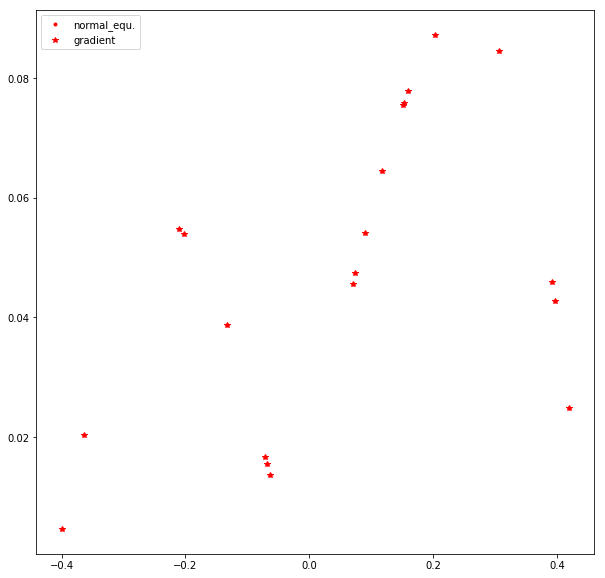

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(x_prove, error1, "r.")
plt.plot(x_prove, error2, "r*")
# plt.plot(x,error0,"g.")
plt.legend(["normal_equ.", "gradient"])

##### 可见梯度下降绝对误差较小，参数推广能力较好；normal equ误差很小，推广能力很好

In [27]:
# 取10个特征值时

n = 9

X = Data_array(x, n)
Y = y

# normal equ.
Theta_prediction2_1 = NormalEquation(X, Y)
Y_prediction2_1 = np.dot(X, Theta_prediction2_1)

# 梯度下降
alpha = 1
iters = 300000  # 增加了迭代次数
J = np.empty(iters)
times = np.arange(iters)
Theta_prediction2_2 = np.random.rand(n+1, 1)
for i in np.arange(iters):
    Theta_prediction2_2 = Theta_prediction2_2 - alpha * \
        np.dot(X.T, (np.dot(X, Theta_prediction2_2)-Y))/m
    J[i] = np.dot((np.dot(X, Theta_prediction2_2)-Y).T,
                  np.dot(X, Theta_prediction2_2)-Y)/2/m

# 验证集
y_true = truevalue1(x_prove, a, b, c, d)

# normal equ.
y_predict1 = Theta_prediction2_1[0]+Theta_prediction2_1[1]*x_prove+Theta_prediction2_1[2]*x_prove*x_prove + \
    Theta_prediction2_1[3]*x_prove*x_prove*x_prove + \
    Theta_prediction2_1[4]*x_prove*x_prove*x_prove*x_prove

# 梯度下降
y_predict2 = Theta_prediction2_2[0]+Theta_prediction2_2[1]*x_prove+Theta_prediction2_2[2]*x_prove*x_prove + \
    Theta_prediction2_2[3]*x_prove*x_prove*x_prove + \
    Theta_prediction2_2[4]*x_prove*x_prove*x_prove*x_prove

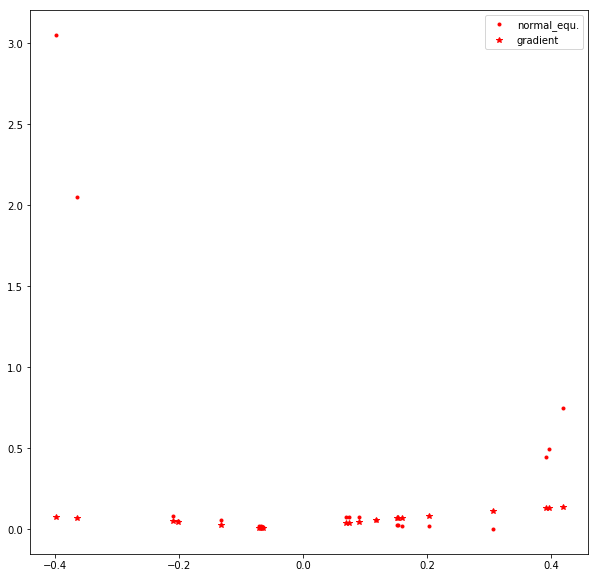

In [28]:
error1 = abs(y_true-y_predict1)
error2 = abs(y_true-y_predict2)
error0 = abs(y-truevalue1(x, a, b, c, d))
plt.figure(figsize=(10, 10))
plt.plot(x_prove, error1, "r.")
plt.plot(x_prove, error2, "r*")
# plt.plot(x,error0,"g.")
plt.legend(["normal_equ.", "gradient"])

##### 可见当特征数增大时，验证集的绝对误差很大，出现了过拟合

## 对于sin(ax)

In [33]:
# 样本数
m = 60

a = 3

flucuation = 1

# 随机数种子
np.random.seed(0)
x = np.random.rand(m, 1)-0.5  # 原点附近的随机数
flu_array = flucuation*(np.random.rand(m, 1)-0.5)  # 波动值向量
y = truevalue2(x, a)+flu_array

# 取100个特征数时

n = 99

X = Data_array(x, n)
Y = y

# normal equ.
Theta_prediction3_1 = NormalEquation(X, Y)
Y_prediction3_1 = np.dot(X, Theta_prediction3_1)

# 梯度下降
n = 99
alpha = 1
iters = 10000
J = np.empty(iters)
times = np.arange(iters)
Theta_prediction3_2 = np.random.rand(n+1, 1)
for i in np.arange(iters):
    Theta_prediction3_2 = Theta_prediction3_2 - alpha * \
        np.dot(X.T, (np.dot(X, Theta_prediction3_2)-Y))/m
    J[i] = np.dot((np.dot(X, Theta_prediction3_2)-Y).T,
                  np.dot(X, Theta_prediction3_2)-Y)/2/m

# #验证集
# y_true=truevalue1(x_prove,a,b,c,d)

# #normal equ.
# y_predict1=Theta_prediction2_1[0]+Theta_prediction2_1[1]*x_prove+Theta_prediction2_1[2]*x_prove*x_prove+Theta_prediction2_1[3]*x_prove*x_prove*x_prove+Theta_prediction2_1[4]*x_prove*x_prove*x_prove*x_prove

# #梯度下降
# y_predict2=Theta_prediction2_2[0]+Theta_prediction2_2[1]*x_prove+Theta_prediction2_2[2]*x_prove*x_prove+Theta_prediction2_2[3]*x_prove*x_prove*x_prove+Theta_prediction2_2[4]*x_prove*x_prove*x_prove*x_prove

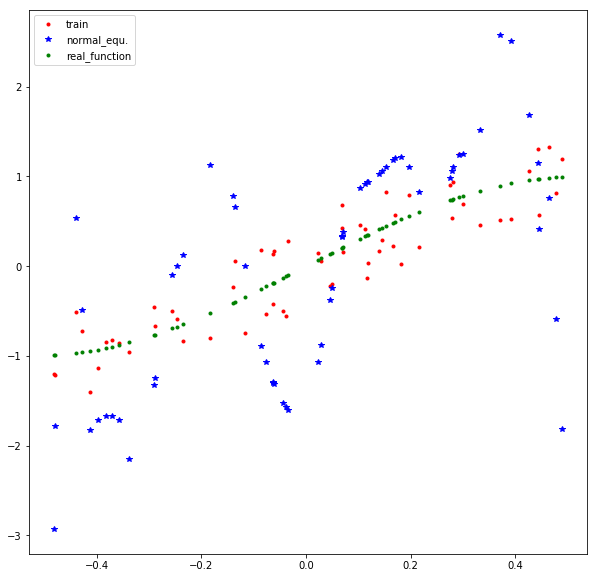

In [34]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction3_1, "b*", x, truevalue2(x, a), "g.")
plt.legend(["train", "normal_equ.", "real_function"])

##### 取100个特征值时normal equ.无法拟合

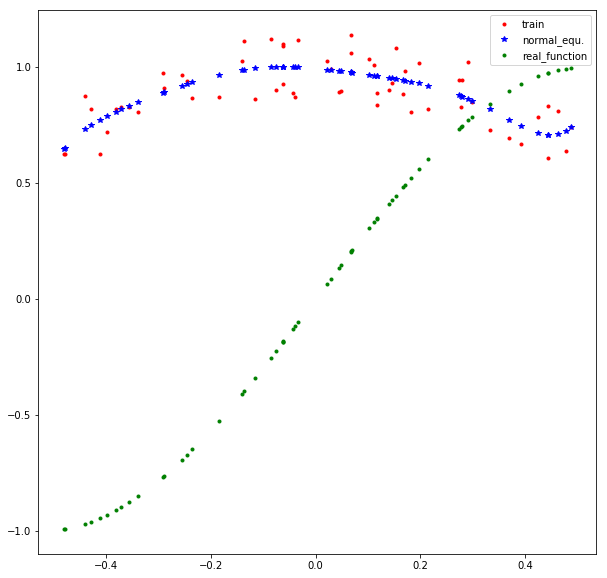

In [71]:
n = 7
X = Data_array(x, n)
Y = y

# normal equ.
Theta_prediction3_1 = NormalEquation(X, Y)
Y_prediction3_1 = np.dot(X, Theta_prediction3_1)

plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction3_1, "b*", x, truevalue2(x, a), "g.")
plt.legend(["train", "normal_equ.", "real_function"])

##### 无论怎样改变特征值数量都无法拟合或出现过拟合现象

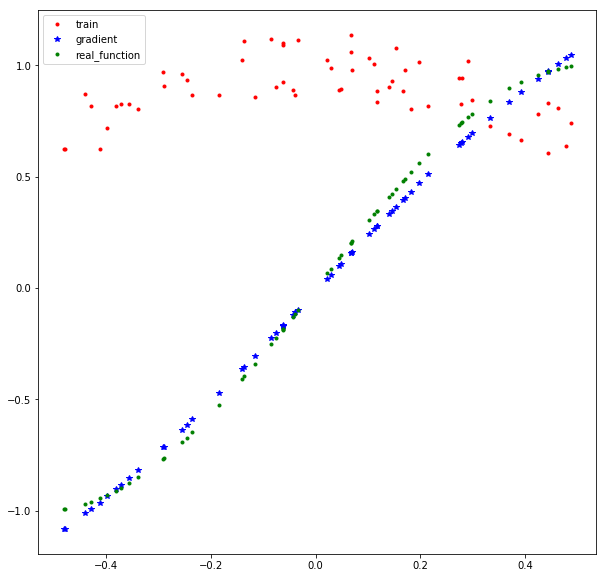

In [58]:
n = 99

X = Data_array(x, n)
Y_prediction3_2 = np.dot(X, Theta_prediction3_2)
plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction3_2, "b*", x, truevalue2(x, a), "g.")
plt.legend(["train", "gradient", "real_function"])

##### 梯度下降拟合很好

## 对于sinc(ax)

In [41]:
# 样本数
m = 60

a = 3

flucuation = 0.3

# 随机数种子
np.random.seed(0)
x = np.random.rand(m, 1)-0.5  # 原点附近的随机数
flu_array = flucuation*(np.random.rand(m, 1)-0.5)  # 波动值向量
y = truevalue3(x, a)+flu_array

# 取100个特征数时

n = 99

X = Data_array(x, n)
Y = y

# normal equ.
Theta_prediction4_1 = NormalEquation(X, Y)
Y_prediction4_1 = np.dot(X, Theta_prediction4_1)

# 梯度下降


# 取100个特征数时

n = 99

alpha = 1
iters = 10000
J = np.empty(iters)
times = np.arange(iters)
Theta_prediction4_2 = np.random.rand(n+1, 1)
for i in np.arange(iters):
    Theta_prediction4_2 = Theta_prediction4_2 - alpha * \
        np.dot(X.T, (np.dot(X, Theta_prediction4_2)-Y))/m
    J[i] = np.dot((np.dot(X, Theta_prediction4_2)-Y).T,
                  np.dot(X, Theta_prediction4_2)-Y)/2/m

# #验证集
# y_true=truevalue1(x_prove,a,b,c,d)

# #normal equ.
# y_predict1=Theta_prediction2_1[0]+Theta_prediction2_1[1]*x_prove+Theta_prediction2_1[2]*x_prove*x_prove+Theta_prediction2_1[3]*x_prove*x_prove*x_prove+Theta_prediction2_1[4]*x_prove*x_prove*x_prove*x_prove

# #梯度下降
# y_predict2=Theta_prediction2_2[0]+Theta_prediction2_2[1]*x_prove+Theta_prediction2_2[2]*x_prove*x_prove+Theta_prediction2_2[3]*x_prove*x_prove*x_prove+Theta_prediction2_2[4]*x_prove*x_prove*x_prove*x_prove

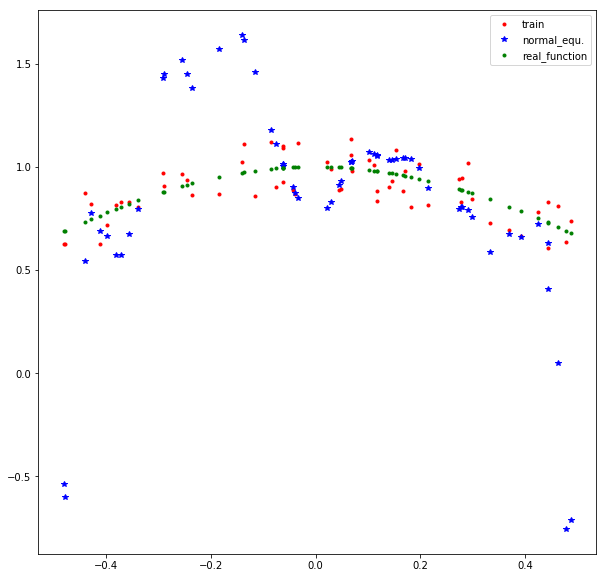

In [42]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction4_1, "b*", x, truevalue3(x, a), "g.")
plt.legend(["train", "normal_equ.", "real_function"])

##### 取100个特征数时normal equ.无法拟合

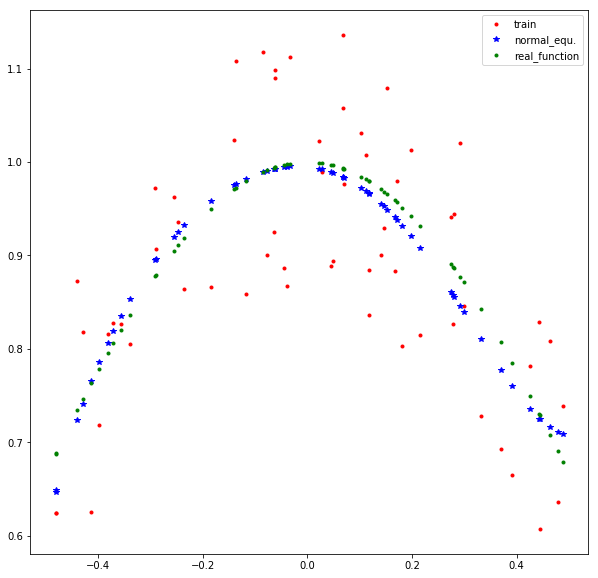

In [61]:
n = 5

X = Data_array(x, n)
Y = y

# normal equ.
Theta_prediction4_1 = NormalEquation(X, Y)
Y_prediction4_1 = np.dot(X, Theta_prediction4_1)

plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction4_1, "b*", x, truevalue3(x, a), "g.")
plt.legend(["train", "normal_equ.", "real_function"])

##### 特征值数量取较少时可以拟合

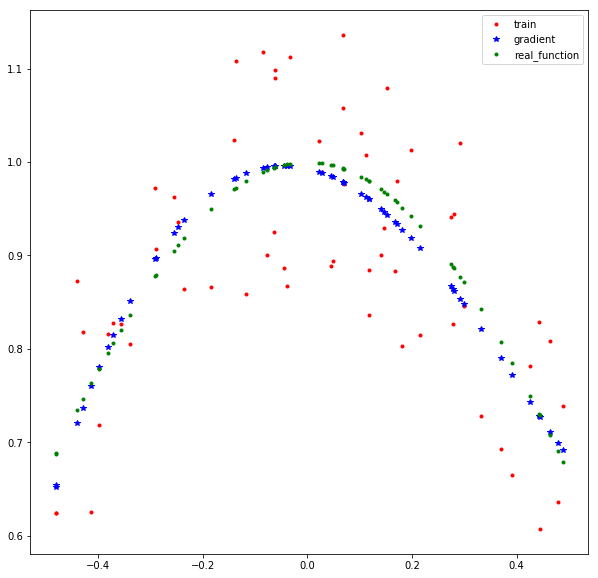

In [13]:
n = 99

X = Data_array(x, n)

Y_prediction4_2 = np.dot(X, Theta_prediction4_2)
plt.figure(figsize=(10, 10))
plt.plot(x, y, "r.", x, Y_prediction4_2, "b*", x, truevalue3(x, a), "g.")
plt.legend(["train", "gradient", "real_function"])

##### 梯度下降拟合很好